<a href="https://colab.research.google.com/github/AhmedA245/AhmedA245/blob/main/Heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Reading the datset

df = pd.read_csv('/content/heart_failure_clinical_records.csv')

In [ ]:
## checking the dataset

df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0


In [ ]:
## checking the shape of datset

df.shape

(5000, 13)

In [ ]:
## checking general info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [ ]:
## checking statistics of data

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
## checking for null values

df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
## checking duplicates

duplicates=df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 3680


In [ ]:
## show the duplicates

df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
18,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
51,45.0,0,308,0,40,1,51000.0,1.3,136,1,1,186,0
58,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
65,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
81,45.0,0,615,1,55,0,236000.0,0.8,141,0,0,257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


The duplicated rows seem to belong to anemia, diabetes etc, which are bound to be duplicated. Hence leaving the rows as it is.

In [ ]:
# Check for missing values
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
## detecting outliers in age

# Detecting outliers using z-score
z_scores = (df['age'] - df['age'].mean()) / df['age'].std()
outliers = df[abs(z_scores) > 3]
print("Outliers based on age:")
print(outliers)

Outliers based on age:
Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []


No outliers based on age.

Statistical summary by plotting correlation matrix and distribution graphs

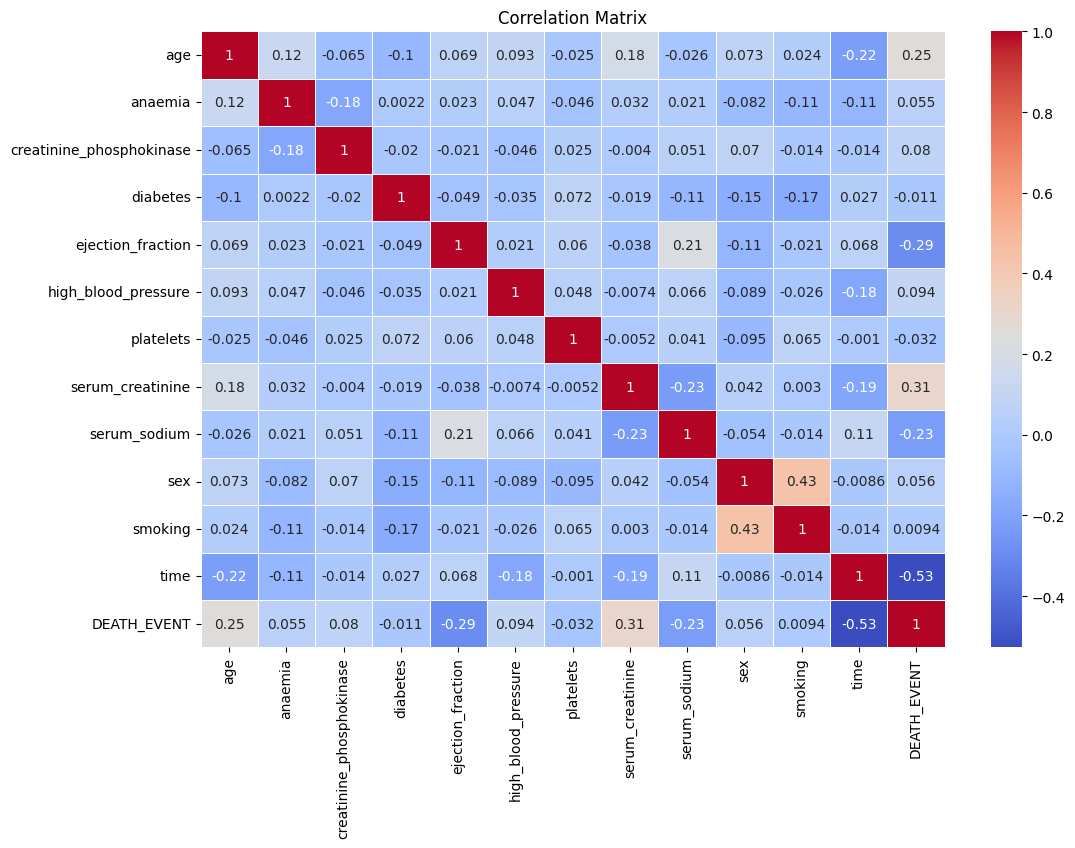

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

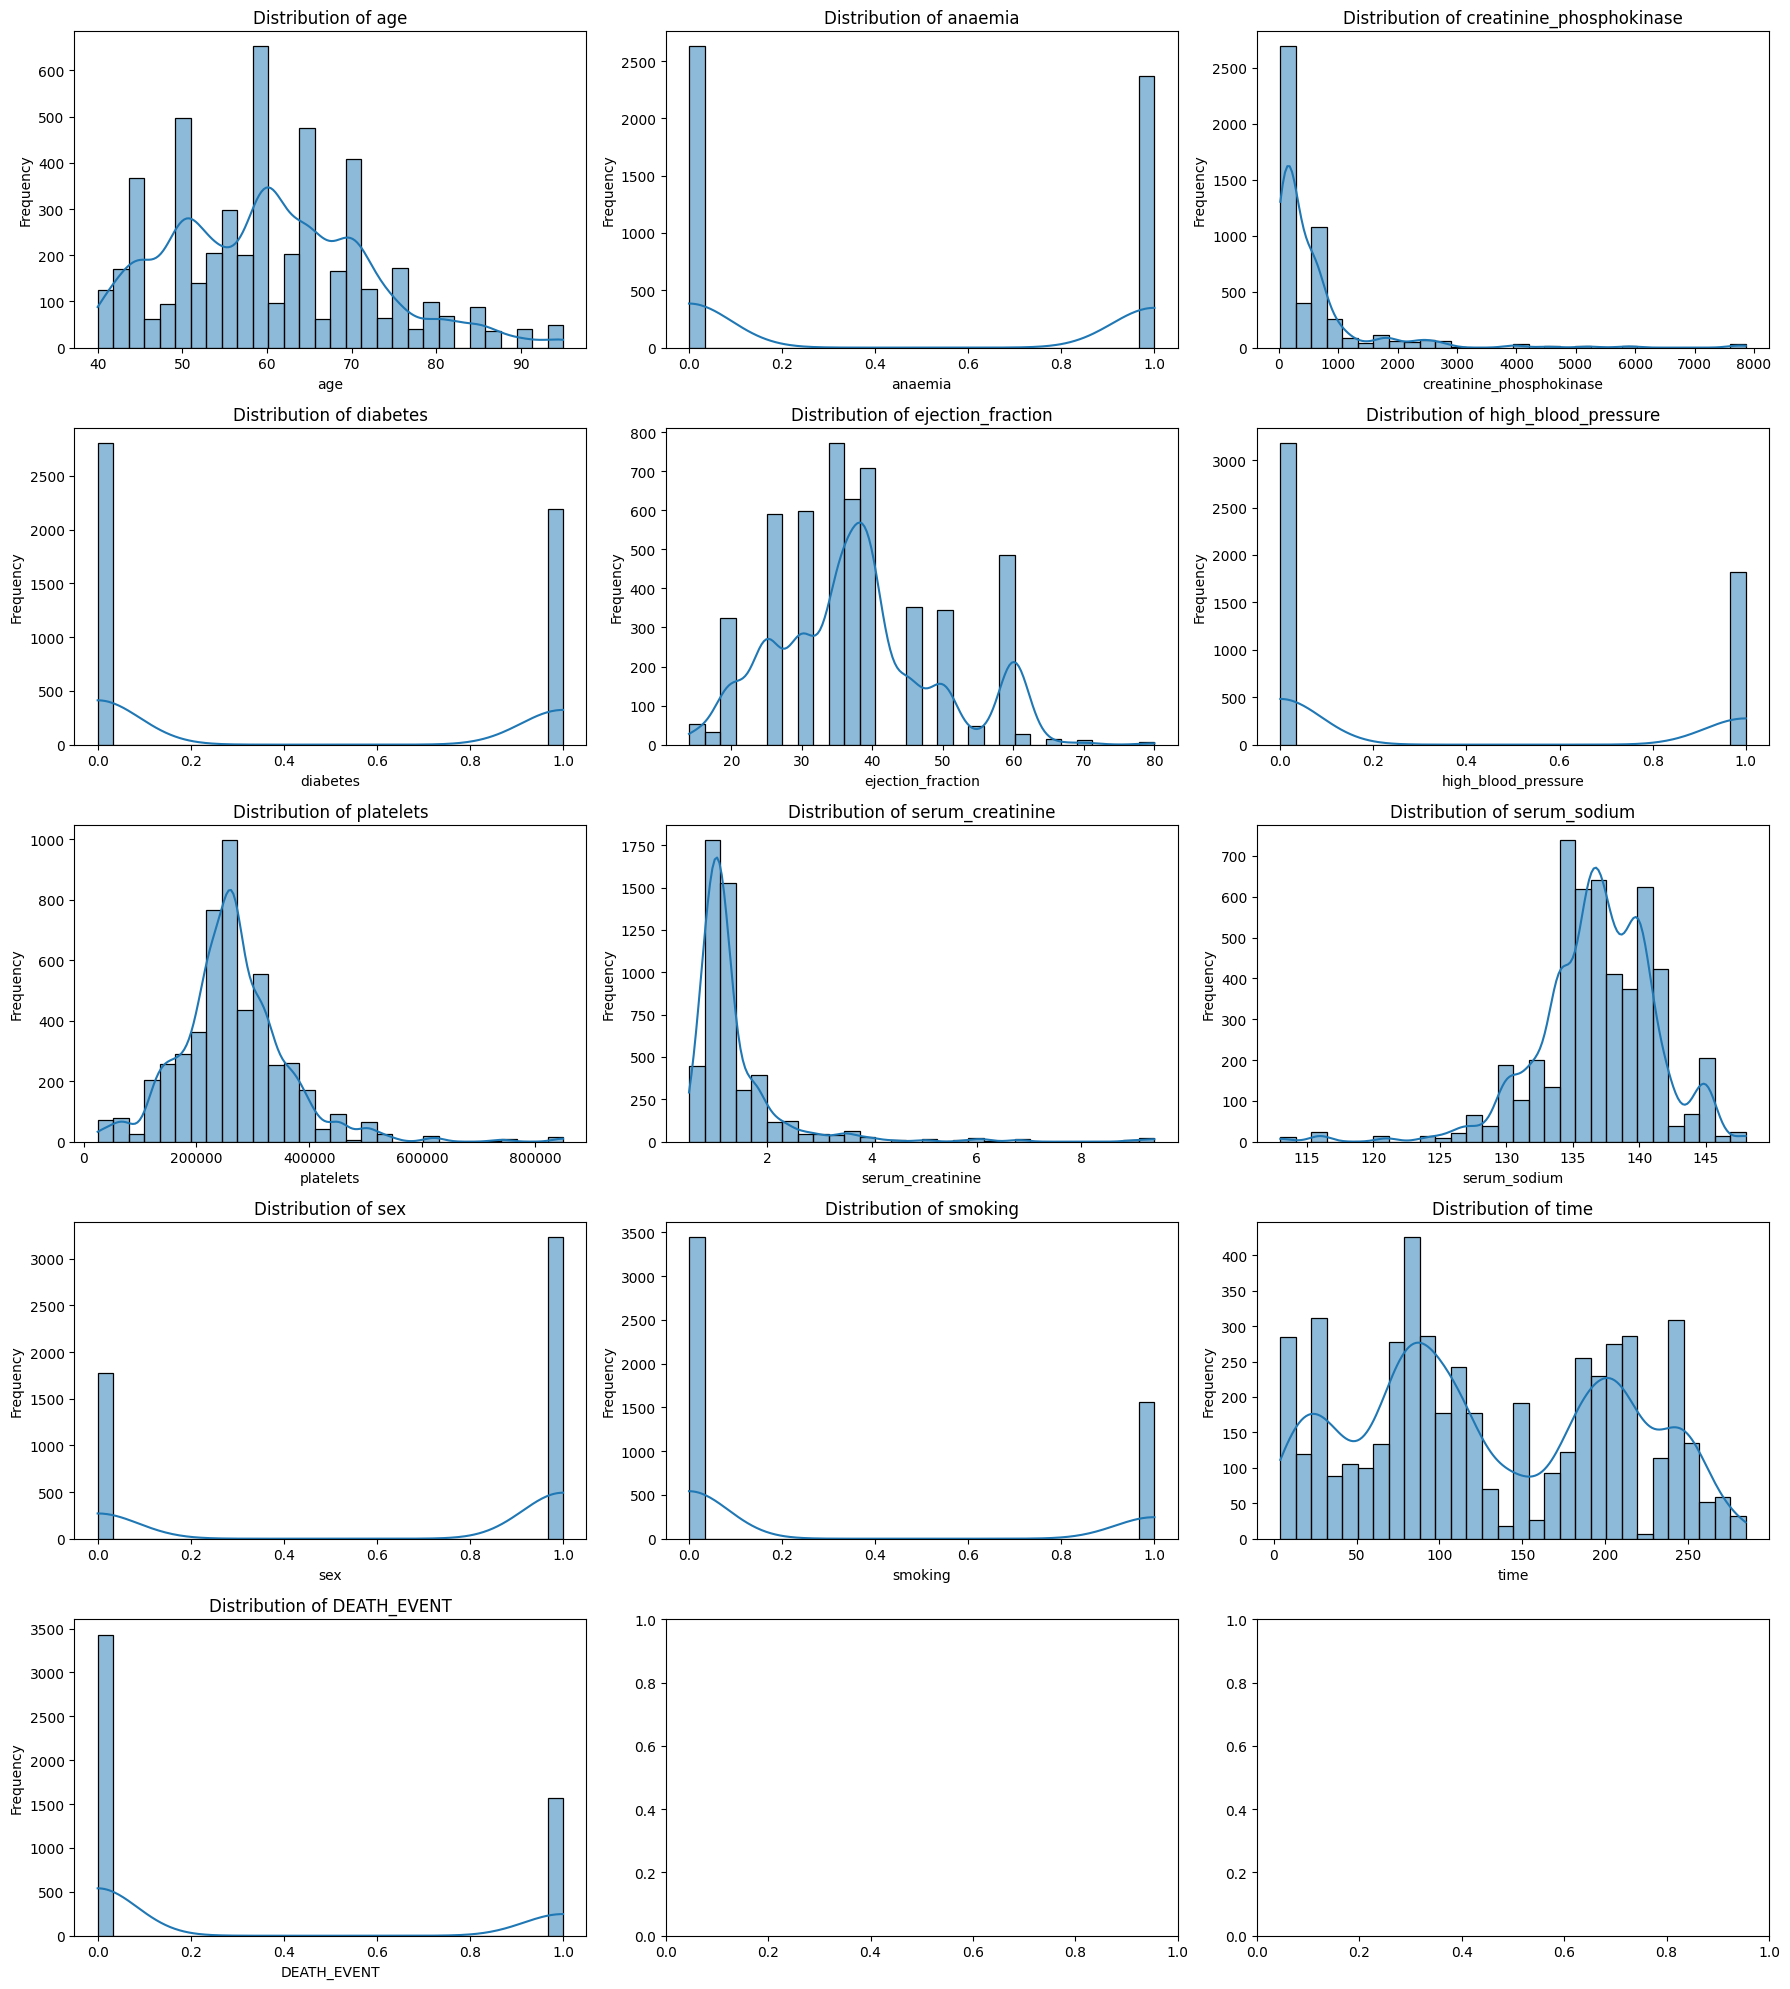

In [ ]:
## distribution graphs

numerical_features = ['age','anaemia','creatinine_phosphokinase'
,'diabetes'
,'ejection_fraction'
,'high_blood_pressure'
,'platelets'
,'serum_creatinine'
,'serum_sodium'
,'sex'
,'smoking'
,'time'
,'DEATH_EVENT'
]


# Plotting distributions
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

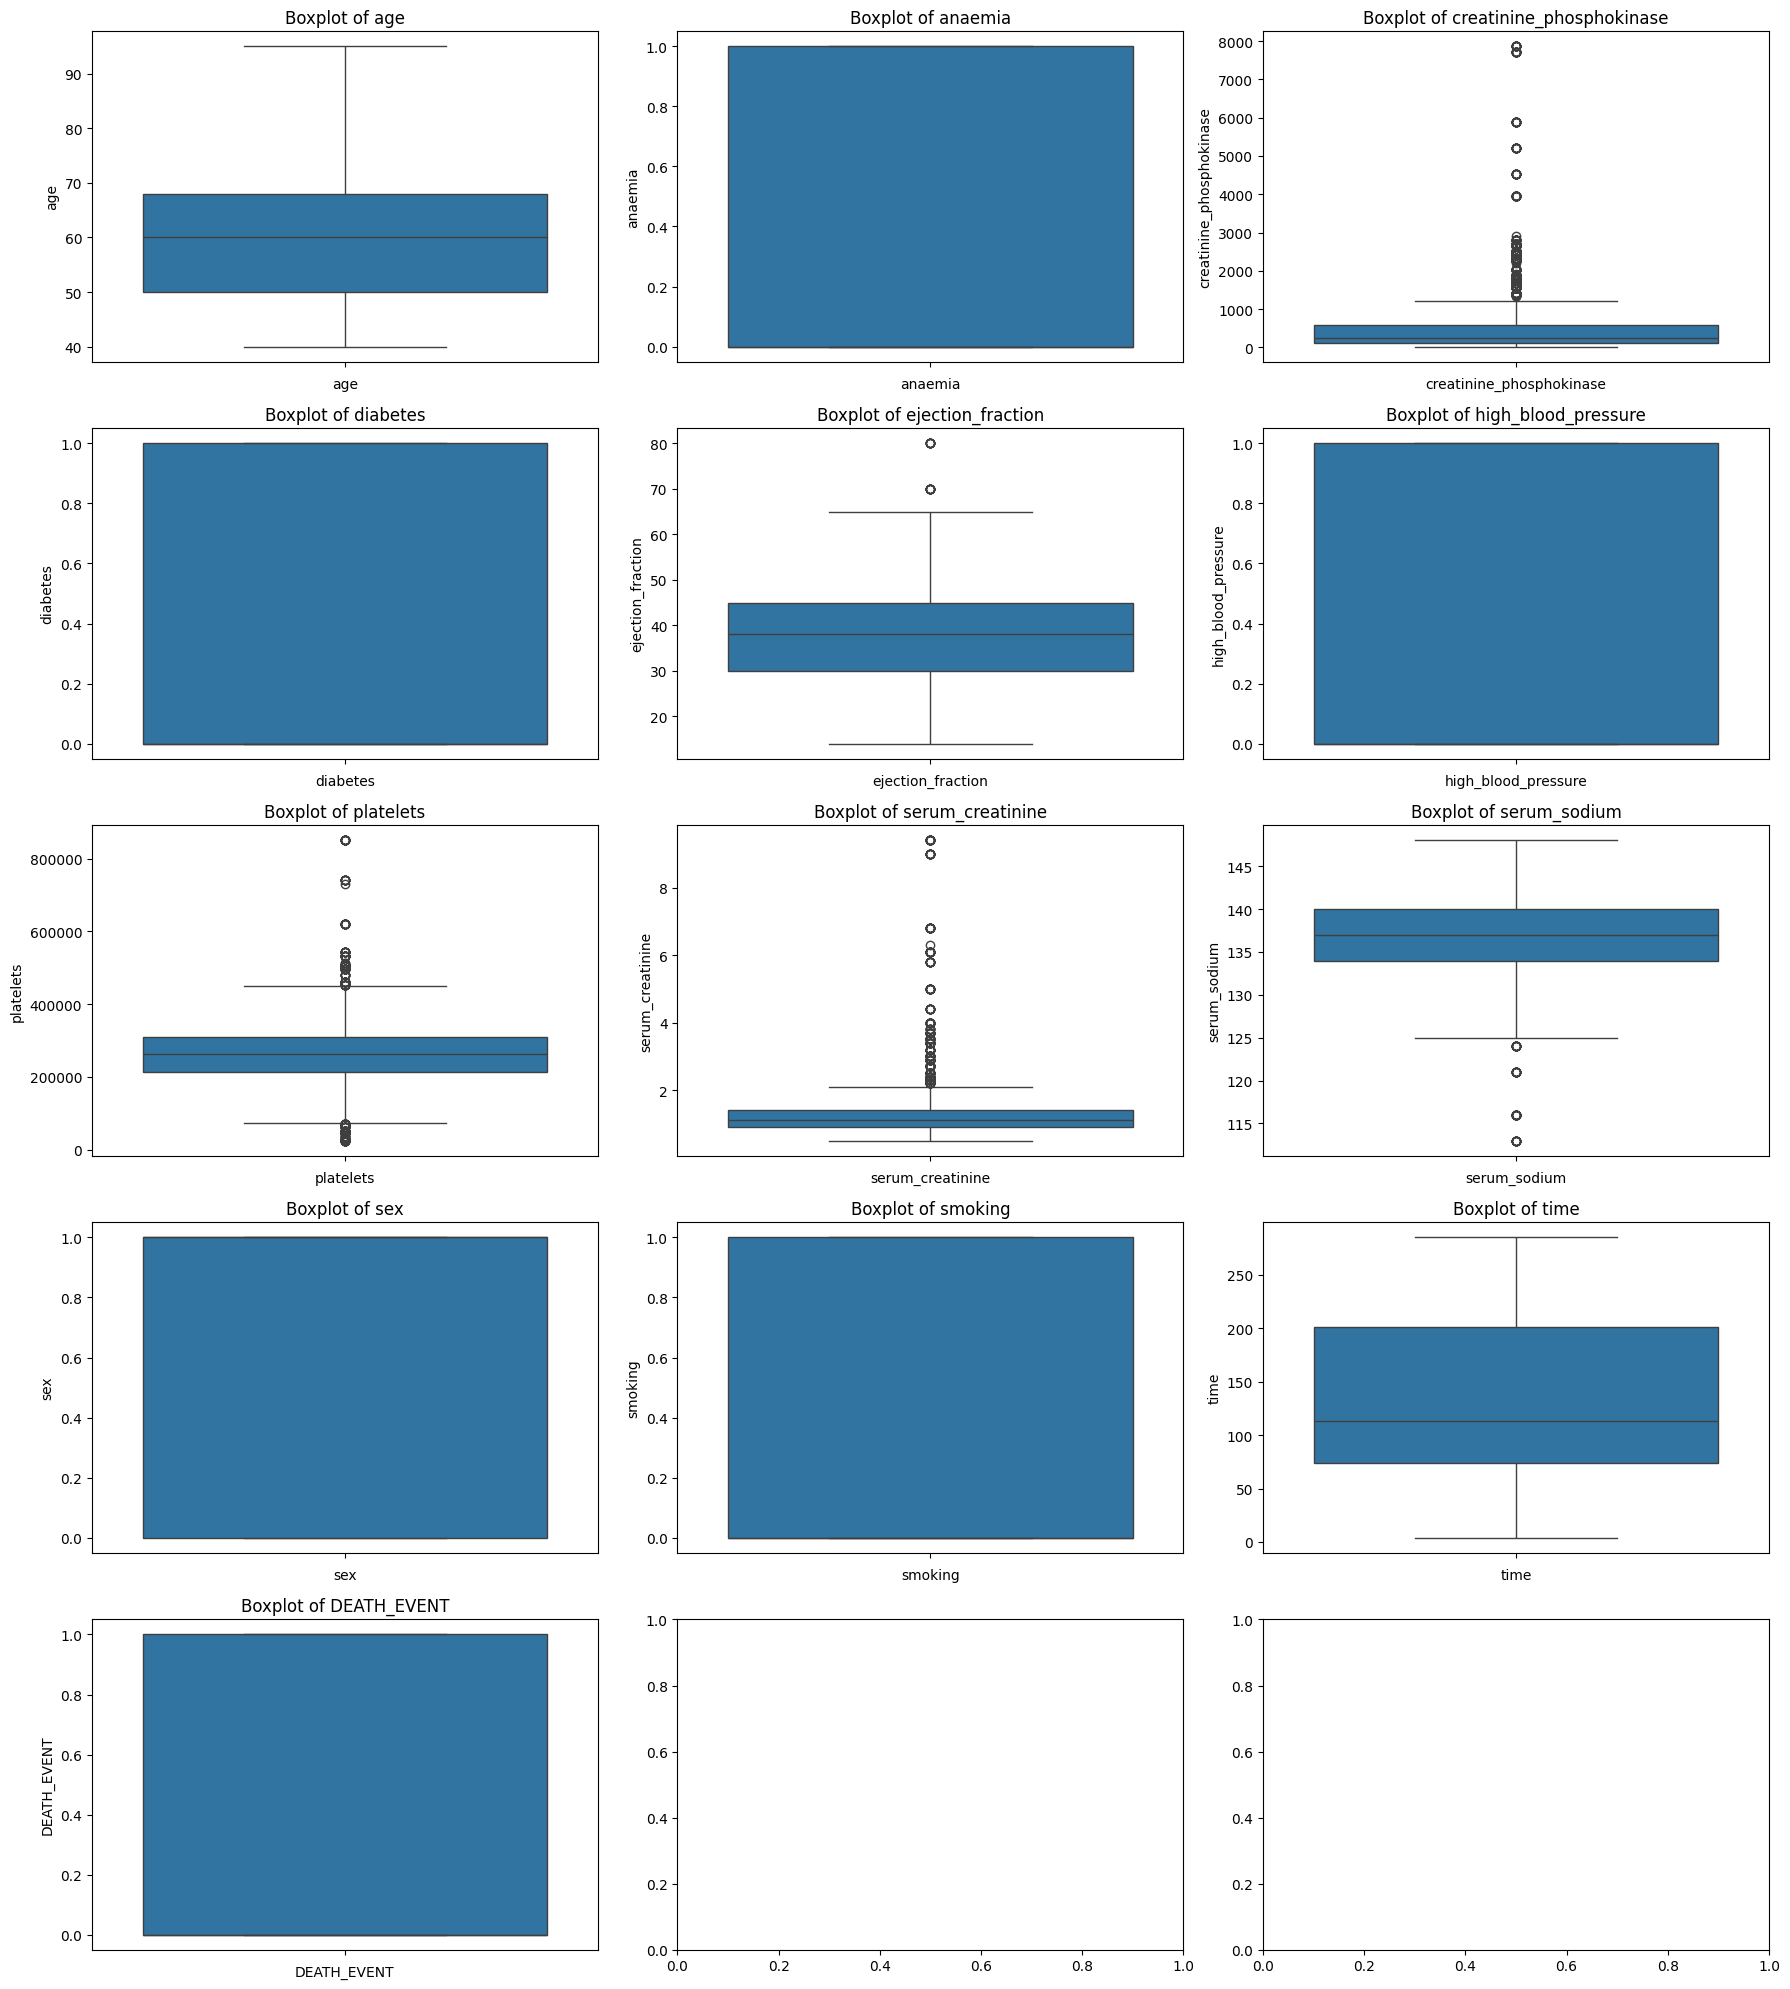

In [ ]:
# Check for outliers in numerical features using box plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

Can see outliers for creatinine_phosphokinase, platelets,serum_creatinine,serum_sodium

Removing outliers for Creatinine_phosphokinase

In [ ]:
## removing the outliers using the interqantile method

q1=df.creatinine_phosphokinase.quantile(0.25)
q3=df.creatinine_phosphokinase.quantile(0.75)
q1,q3

iqr=q3-q1
iqr

lower_limit=q1-1.5*iqr
upper_limit=q1+1.5*iqr
lower_limit, upper_limit

df[(df.creatinine_phosphokinase<lower_limit) |(df.creatinine_phosphokinase>upper_limit) ]


df['creatinine_phosphokinase']=np.where(
    new_df_cap['creatinine_phosphokinase']> upper_limit,
    upper_limit,
np.where(
    new_df_cap['creatinine_phosphokinase']< lower_limit,
    lower_limit,
    new_df_cap['creatinine_phosphokinase']
))

In [ ]:
new_df_cap.shape
new_df_cap1=new_df_cap


<Axes: ylabel='creatinine_phosphokinase'>

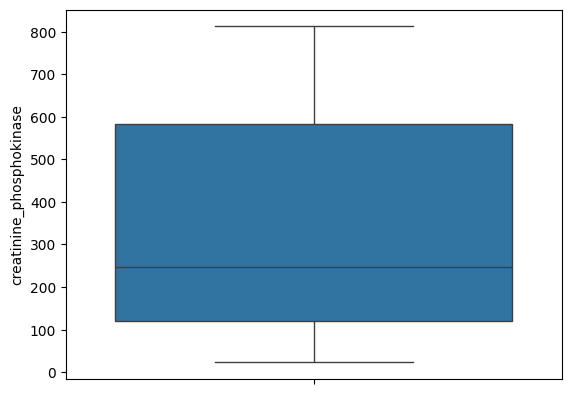

In [ ]:
sns.boxplot(new_df_cap1['creatinine_phosphokinase'])

Removing outliers for platelets

In [ ]:
## removing the outliers using the interqantile method

q1=df.platelets.quantile(0.25)
q3=df.platelets.quantile(0.75)
q1,q3

iqr=q3-q1
iqr

lower_limit=q1-1.5*iqr
upper_limit=q1+1.5*iqr
lower_limit, upper_limit

df[(df.platelets<lower_limit) |(df.platelets>upper_limit) ]

new_df_cap1=new_df_cap.copy()
new_df_cap1['platelets']=np.where(
    new_df_cap1['platelets']> upper_limit,
    upper_limit,
np.where(
    new_df_cap1['platelets']< lower_limit,
    lower_limit,
    new_df_cap1['platelets']
))

In [ ]:
## checking the shape

new_df_cap1.shape


(5000, 13)

<Axes: ylabel='platelets'>

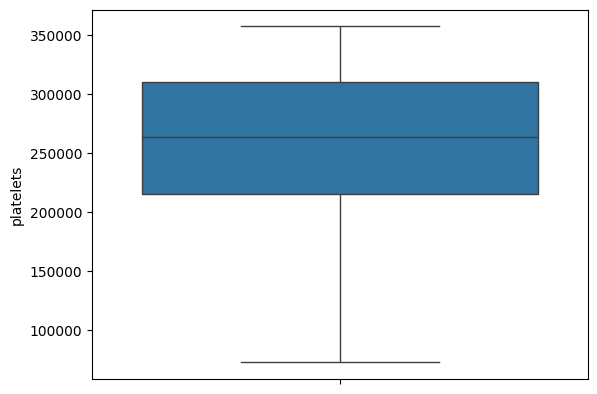

In [ ]:
sns.boxplot(new_df_cap1['platelets'])

Removing outliers for serum_creatinine

In [ ]:
q1=df.serum_creatinine.quantile(0.25)
q3=df.serum_creatinine.quantile(0.75)
q1,q3

iqr=q3-q1
iqr

lower_limit=q1-1.5*iqr
upper_limit=q1+1.5*iqr
lower_limit, upper_limit

df[(df.serum_creatinine<lower_limit) |(df.serum_creatinine>upper_limit) ]

new_df_cap=df.copy()
new_df_cap['serum_creatinine']=np.where(
    new_df_cap['serum_creatinine']> upper_limit,
    upper_limit,
np.where(
    new_df_cap['serum_creatinine']< lower_limit,
    lower_limit,
    new_df_cap['serum_creatinine']
))


In [ ]:
new_df_cap.shape

(5000, 13)

In [ ]:
new_df_cap1=new_df_cap

<Axes: ylabel='serum_creatinine'>

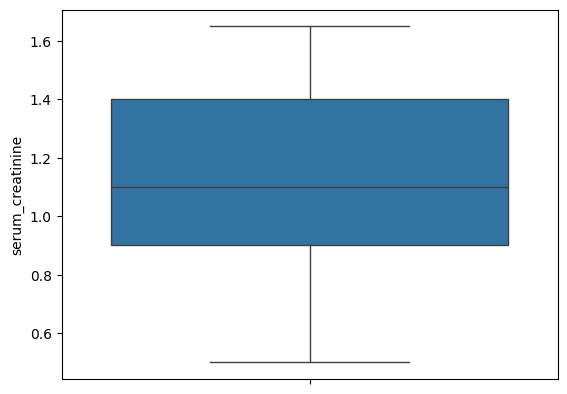

In [ ]:
sns.boxplot(new_df_cap1['serum_creatinine'])

Removing the outlier for serum_sodium

In [ ]:
q1=df.serum_sodium.quantile(0.25)
q3=df.serum_sodium.quantile(0.75)
q1,q3

iqr=q3-q1
iqr

lower_limit=q1-1.5*iqr
upper_limit=q1+1.5*iqr
lower_limit, upper_limit


new_df_cap1['serum_sodium']=np.where(
    new_df_cap1['serum_sodium']> upper_limit,
    upper_limit,
np.where(
    new_df_cap1['serum_sodium']< lower_limit,
    lower_limit,
    new_df_cap1['serum_sodium']
))


In [ ]:
new_df_cap1.shape

(5000, 13)

<Axes: ylabel='serum_sodium'>

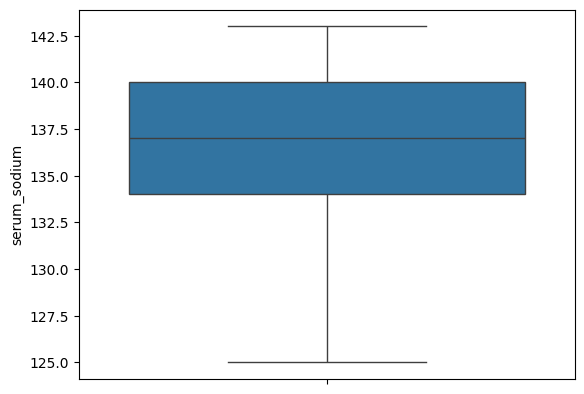

In [ ]:
sns.boxplot(new_df_cap1['serum_sodium'])

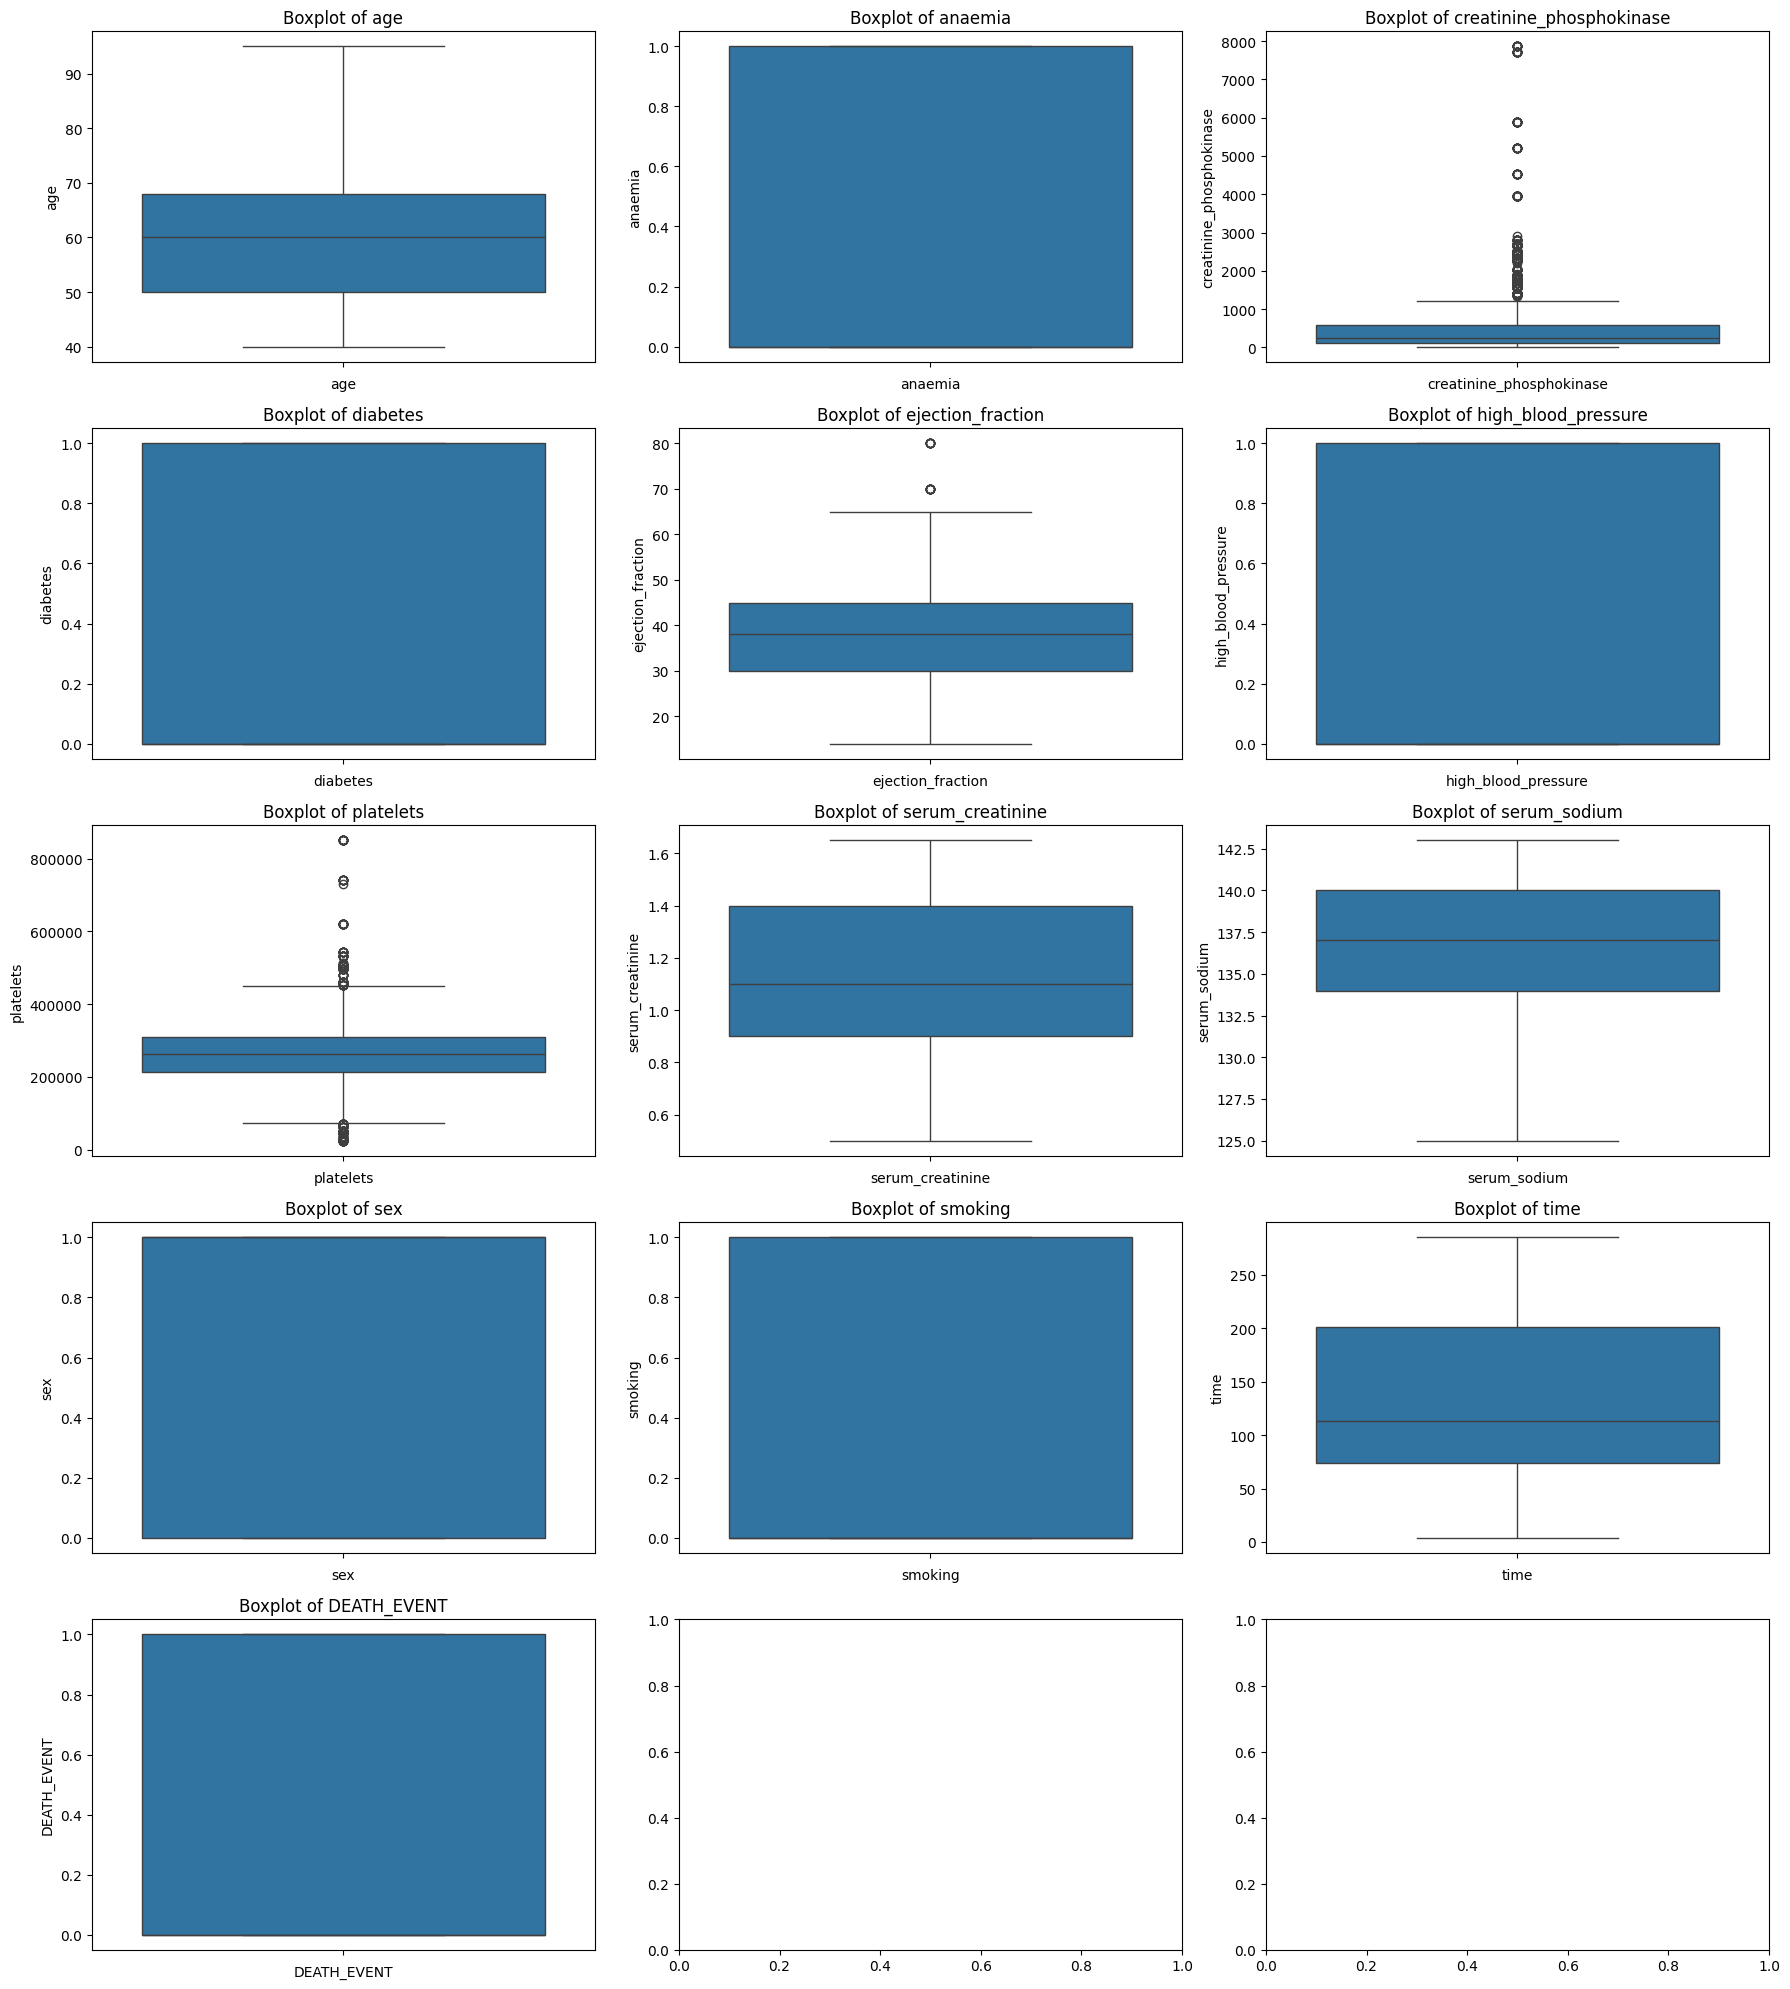

In [ ]:
# Check for outliers in numerical features using box plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(new_df_cap1[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
### renaming the dataset for simplicity

heart_failure=new_df_cap1

In [ ]:
heart_failure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
heart_failure.shape

(5000, 13)

Text(0.5, 1.0, 'Showing the DEATH EVENT')

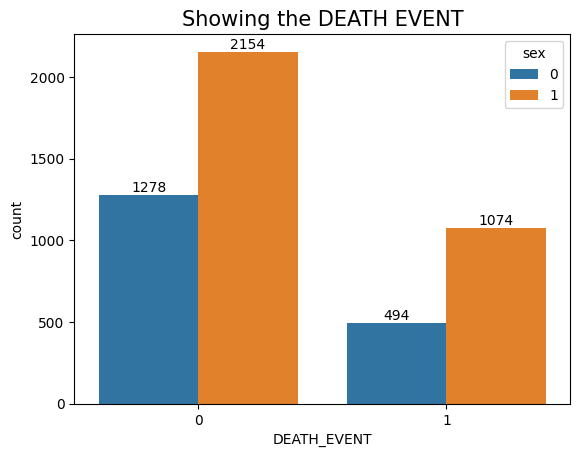

In [ ]:
ax= sns.countplot(x='DEATH_EVENT', hue='sex', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Showing the DEATH EVENT", fontsize=15)

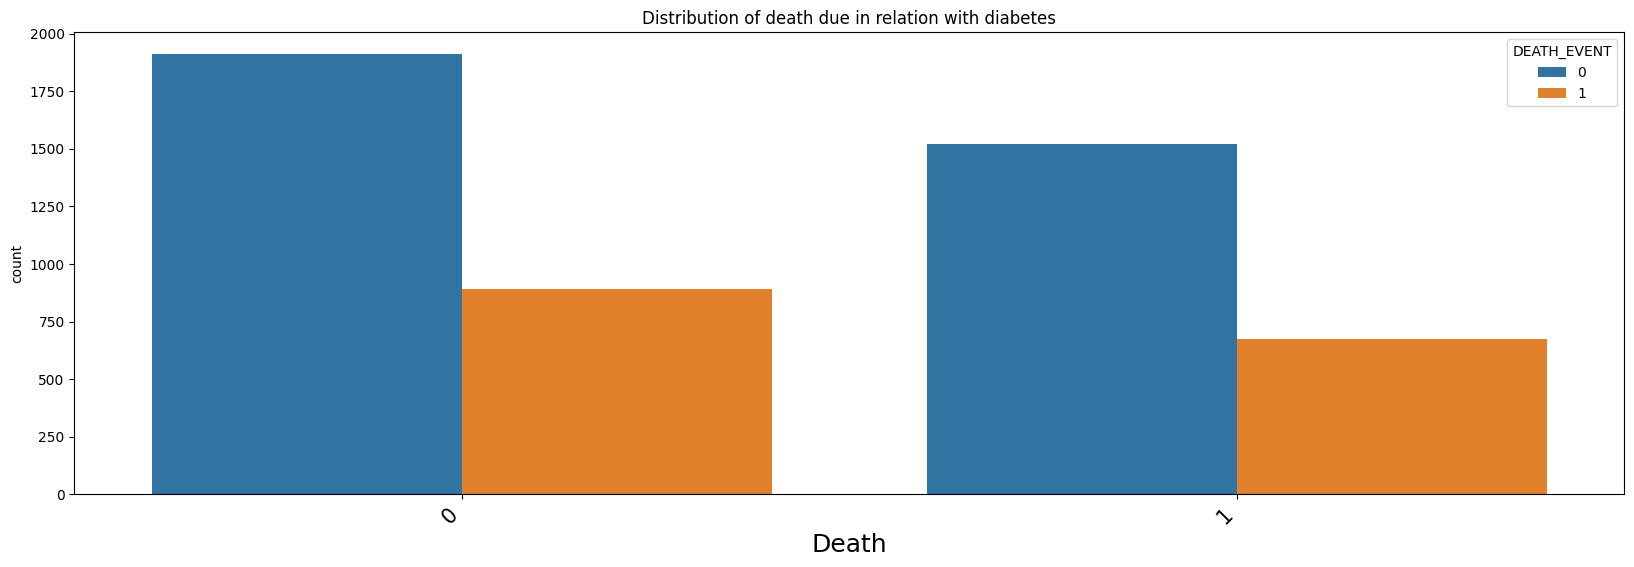

In [ ]:
plt.figure(figsize=(20,6))
x=sns.countplot(data=heart_failure, x='diabetes', hue='DEATH_EVENT')
plt.title("Distribution of death due in relation with diabetes")
plt.xlabel("Death", fontsize=18, color= 'black')
plt.xticks(rotation =45, ha='right', fontsize=15)
plt.show()

In [ ]:
heart_failure.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137.0,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,1.65,130.0,1,0,207,0


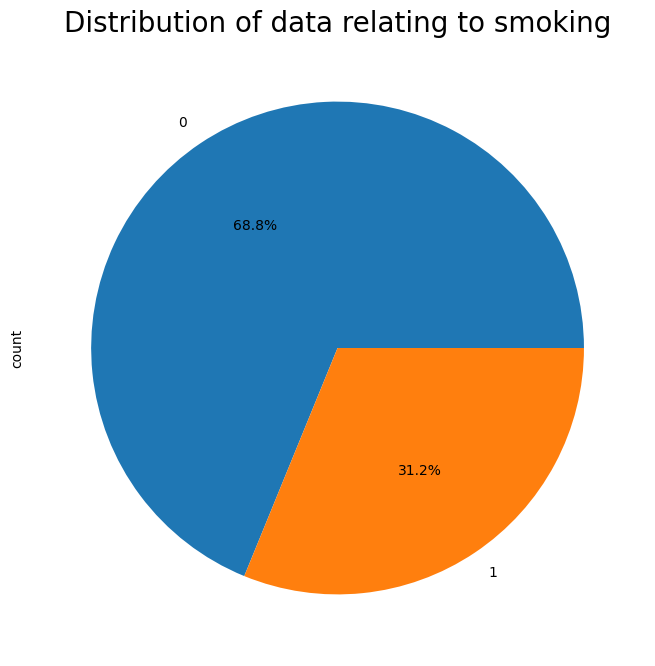

In [ ]:
plt.figure(figsize=(6,3))
heart_failure["smoking"].value_counts().plot.pie(figsize=(12,8),autopct="%0.1f%%")
plt.title("Distribution of data relating to smoking", fontsize=20)
plt.show()

<Figure size 2000x1000 with 0 Axes>

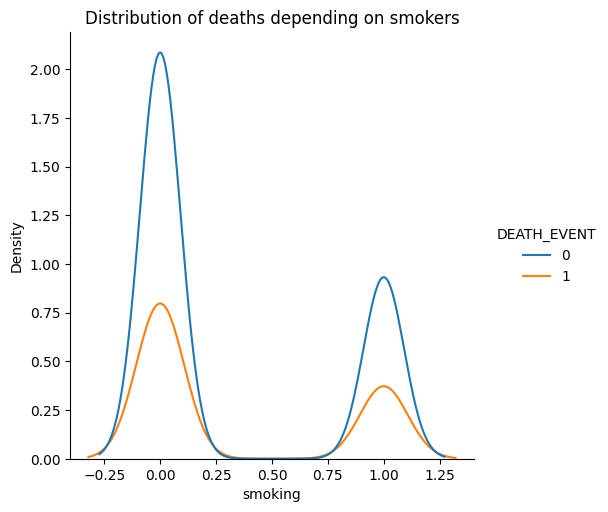

In [ ]:
## distribution of smokers to death

plt.figure(figsize=(20,10))
sns.displot(data=heart_failure, x='smoking', hue='DEATH_EVENT', kind='kde')
plt.title("Distribution of deaths depending on smokers")
plt.show()

In [ ]:
# Standardize the features using StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Identify outliers that are more than 3 standard deviations away from the mean
z_scores = np.abs(X_scaled)  # Compute the Z-scores (absolute values)
outliers_mask = (z_scores < 3).all(axis=1)  # Boolean mask for data points within 3 standard deviations

# Filter the dataset to remove outliers
data_cleaned_standard_scaler = data[outliers_mask]

# Show the size of the cleaned dataset and a few rows
cleaned_standard_scaler_size = data_cleaned_standard_scaler.shape
data_cleaned_standard_scaler_head = data_cleaned_standard_scaler.head()

# Output the cleaned dataset information
print(f"Cleaned dataset size: {cleaned_standard_scaler_size}")
print(f"First few rows of the cleaned dataset:\n{data_cleaned_standard_scaler_head}")

NameError: name 'StandardScaler' is not defined